In [1]:
import scipy.cluster.hierarchy as sch
from scipy import stats

In [2]:
from pytadbit.parsers.hic_bam_parser import filters_to_bin

In [3]:
from pytadbit.mapping.filter        import MASKED

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [18]:
import matplotlib.patches as patches
import networkx as nx

In [6]:
plt.rcParams["font.family"] = "Arial Narrow"

In [7]:
colors = {
    '0h'  : "#fde72580", 
    '1h'  : "#37b57880",
    '4h'  : "#21908d80",
    '7h'  : "#31668d80",
    '10h' : "#43377f80",
    '24h' : "#44015480",
    'w24h': '#fb852480',
#     'w48h': '#00000080',
}

In [8]:
noacolors = {
    '0h'  : "#fde725", 
    '1h'  : "#37b578",
    '4h'  : "#21908d",
    '7h'  : "#31668d",
    '10h' : "#43377f",
    '24h' : "#440154",
    'w24h': '#fb8524',
#     'w48h': '#00000080',
}

# Load TAD borders

In [9]:
tads = pd.read_csv('../../data/ComplementaryData/HiC/aligned_TADbit_TAD-borders.tsv', sep="\t")

In [10]:
tads = tads.sort_values(["Chromosome", "position"])

In [11]:
tads

,Chromosome,position,pos_0h,score_0h,density_0h,IS_0h,pos_1h,score_1h,density_1h,IS_1h,...,density_24h,IS_24h,pos_w24h,score_w24h,density_w24h,IS_w24h,pos_w48h,score_w48h,density_w48h,IS_w48h
22,chr1,550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,8.0,0.027,0.799884,NaN,NaN,NaN,NaN
39,chr1,887500,NaN,NaN,NaN,NaN,17.0,6.0,0.094,0.828398,...,NaN,NaN,18.0,8.0,2.462,0.198819,NaN,NaN,NaN,NaN
60,chr1,1350000,NaN,NaN,NaN,NaN,27.0,7.0,0.436,0.767976,...,NaN,NaN,27.0,6.0,6.179,0.208175,NaN,NaN,NaN,NaN
69,chr1,1567187,31.0,5.0,0.036,0.796707,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,8.0,3.678,0.340341,31.0,4.0,0.058,0.715773
81,chr1,1850000,37.0,6.0,1.042,0.644016,37.0,4.0,1.369,0.573500,...,NaN,NaN,37.0,9.0,3.283,0.316758,37.0,4.0,3.910,0.221626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,chrX,153400000,3068.0,8.0,0.585,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4417,chrX,153550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3071.0,6.0,2.724,0.317383,NaN,NaN,NaN,NaN
4420,chrX,153750000,NaN,NaN,NaN,NaN,3074.0,8.0,0.575,0.889570,...,NaN,NaN,3076.0,10.0,6.134,0.479904,NaN,NaN,NaN,NaN
4425,chrX,154100000,3082.0,10.0,0.315,0.779226,3082.0,10.0,1.097,0.654872,...,0.01,0.722939,3082.0,10.0,2.339,0.575713,3082.0,10.0,0.402,0.800912


In [12]:
cut = 4
tads = tads[(tads['score_0h'] > cut) | (tads['score_1h' ] > cut) | (tads['score_4h' ] > cut) |
            (tads['score_7h'] > cut) | (tads['score_10h'] > cut) | (tads['score_24h'] > cut)]

In [13]:
tps = ['0h', '1h', '4h', '7h', '10h', '24h', 'w24h']

In [14]:
tads

,Chromosome,position,pos_0h,score_0h,density_0h,IS_0h,pos_1h,score_1h,density_1h,IS_1h,...,density_24h,IS_24h,pos_w24h,score_w24h,density_w24h,IS_w24h,pos_w48h,score_w48h,density_w48h,IS_w48h
39,chr1,887500,NaN,NaN,NaN,NaN,17.0,6.0,0.094,0.828398,...,NaN,NaN,18.0,8.0,2.462,0.198819,NaN,NaN,NaN,NaN
60,chr1,1350000,NaN,NaN,NaN,NaN,27.0,7.0,0.436,0.767976,...,NaN,NaN,27.0,6.0,6.179,0.208175,NaN,NaN,NaN,NaN
69,chr1,1567187,31.0,5.0,0.036,0.796707,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,8.0,3.678,0.340341,31.0,4.0,0.058,0.715773
81,chr1,1850000,37.0,6.0,1.042,0.644016,37.0,4.0,1.369,0.573500,...,NaN,NaN,37.0,9.0,3.283,0.316758,37.0,4.0,3.910,0.221626
90,chr1,2087500,42.0,4.0,1.394,0.759987,42.0,4.0,1.586,0.596598,...,NaN,NaN,42.0,9.0,3.052,0.411543,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,chrX,152787500,3056.0,10.0,0.986,0.857745,3056.0,4.0,0.813,0.732951,...,NaN,NaN,3056.0,10.0,1.809,0.489622,NaN,NaN,NaN,NaN
4415,chrX,153400000,3068.0,8.0,0.585,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4420,chrX,153750000,NaN,NaN,NaN,NaN,3074.0,8.0,0.575,0.889570,...,NaN,NaN,3076.0,10.0,6.134,0.479904,NaN,NaN,NaN,NaN
4425,chrX,154100000,3082.0,10.0,0.315,0.779226,3082.0,10.0,1.097,0.654872,...,0.01,0.722939,3082.0,10.0,2.339,0.575713,3082.0,10.0,0.402,0.800912


In [15]:
for t in tps:
    tads.loc[tads[f'score_{t}']<=4, f'masked_IS_{t}'] = 0

/tmp/ipykernel_75234/2839000570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tads.loc[tads[f'score_{t}']<=4, f'masked_IS_{t}'] = 0
/tmp/ipykernel_75234/2839000570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tads.loc[tads[f'score_{t}']<=4, f'masked_IS_{t}'] = 0
/tmp/ipykernel_75234/2839000570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [16]:
tads

,Chromosome,position,pos_0h,score_0h,density_0h,IS_0h,pos_1h,score_1h,density_1h,IS_1h,...,score_w48h,density_w48h,IS_w48h,masked_IS_0h,masked_IS_1h,masked_IS_4h,masked_IS_7h,masked_IS_10h,masked_IS_24h,masked_IS_w24h
39,chr1,887500,NaN,NaN,NaN,NaN,17.0,6.0,0.094,0.828398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,chr1,1350000,NaN,NaN,NaN,NaN,27.0,7.0,0.436,0.767976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,chr1,1567187,31.0,5.0,0.036,0.796707,NaN,NaN,NaN,NaN,...,4.0,0.058,0.715773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,chr1,1850000,37.0,6.0,1.042,0.644016,37.0,4.0,1.369,0.573500,...,4.0,3.910,0.221626,NaN,0.0,NaN,NaN,NaN,NaN,NaN
90,chr1,2087500,42.0,4.0,1.394,0.759987,42.0,4.0,1.586,0.596598,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,chrX,152787500,3056.0,10.0,0.986,0.857745,3056.0,4.0,0.813,0.732951,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
4415,chrX,153400000,3068.0,8.0,0.585,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4420,chrX,153750000,NaN,NaN,NaN,NaN,3074.0,8.0,0.575,0.889570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4425,chrX,154100000,3082.0,10.0,0.315,0.779226,3082.0,10.0,1.097,0.654872,...,10.0,0.402,0.800912,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptive stats

## Changes between Time points

### Overlap Coefficient and Jaccard index of Dynamic TAD borders

In [20]:
print(f"Sample  Jaccard Index")
for tp1 in colors:
    av = []
    for tp in colors:
        if tp in [tp1]:
            continue
    
        v = len(tads[(tads[f"score_4h"  ] > 4) & (tads[f"score_{tp}"] > 4)])
        a, b = len(tads[tads[f"score_4h"  ] > 4]),  len(tads[tads[f"score_{tp}"] > 4])
        av.append((v - 2032) / (a + b - v - 2032))
    print(f"{tp1:>6}  {np.median(av):>8.2f}")


Sample  Jaccard Index
    0h      0.57
    1h      0.49
    4h      0.49
    7h      0.49
   10h      0.57
   24h      0.57
  w24h      0.54


In [31]:
 (len(tads[tads["score_0h"] > 4]) - 2032)

1931

In [33]:
print(f"Percentage of overlap with respect to DMSO")
for tp in ['24h', 'w24h']:
    v = len(tads[(tads[f"score_0h"  ] > 4) & (tads[f"score_{tp}"] > 4)])
    print(f"{tp:>6}  {(v - 2032) / (len(tads[tads['score_0h'] > 4]) - 2032):>8.2f}")

Percentage of overlap with respect to DMSO
   24h      0.24
  w24h      0.43


In [35]:
G = nx.Graph()
for m in colors:
    G.add_node(m)
pos = {}
data = {}
for n, m1 in enumerate(colors, 1):
    for m2 in list(colors.keys())[n:]:
        v = len(tads[(tads[f"score_{m1}"  ] > 4) & (tads[f"score_{m2}"] > 4)]) 
        a, b = len(tads[(tads[f"score_{m1}"  ] > 4)]),  len(tads[(tads[f"score_{m2}"] > 4)])
        m = min(a, b)
        # v = (v - 2032) / (m - 2032) * 10  # Overlap Coefficient
        v = (v - 2032) / (a+b-v - 2032) * 10 # Jaccard index
        data[m1, m2] = v
        G.add_edge(m1, m2, weight=v)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

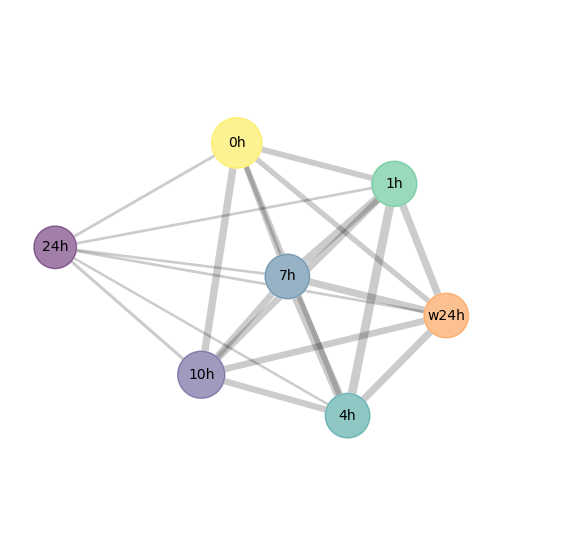

In [36]:
plt.figure(figsize=(7, 7))
axe = plt.subplot(111)
pos = nx.spring_layout(G, iterations=1000, pos=None)
nx.draw_networkx_nodes(G, pos, ax=axe,
                       node_size=[len(tads[(tads[f"score_{m}"] > 4)])/3 for m in nx.nodes(G)],
                       alpha=1,
                       node_color=['w' for m in nx.nodes(G)])
nx.draw_networkx_nodes(G, pos, ax=axe,
                       node_size=[len(tads[(tads[f"score_{m}"] > 4)])/3 for m in nx.nodes(G)],
                       # alpha=1,
                       node_color=[colors[m] for m in nx.nodes(G)])
nx.draw_networkx_edges(G, pos, width=[data[k1, k2]  for k1, k2 in edges], 
                       alpha=0.2, edge_color='k', ax=axe)
nx.draw_networkx_labels(G, pos, ax=axe, font_size=10)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axis('off');

### Gain/lost TAD borders

In [47]:
tads[(tads[f"score_0h"  ] > 4) & 
     (tads[f"score_1h"  ] > 4) &
     (tads[f"score_4h"  ] > 4) &
     (tads[f"score_7h"  ] > 4) &
     (tads[f"score_10h" ] > 4) &
     (tads[f"score_24h" ] > 4) &
     (tads[f"score_w24h"] > 4)]

,Chromosome,position,pos_0h,score_0h,density_0h,IS_0h,pos_1h,score_1h,density_1h,IS_1h,...,score_w48h,density_w48h,IS_w48h,masked_IS_0h,masked_IS_1h,masked_IS_4h,masked_IS_7h,masked_IS_10h,masked_IS_24h,masked_IS_w24h
226,chr1,6087109,120.0,6.0,1.145,0.785247,121.0,7.0,1.213,0.810673,...,9.0,1.332,0.652884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,chr1,8043750,161.0,10.0,1.297,0.439977,161.0,9.0,1.255,0.426274,...,8.0,1.756,0.334670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,chr1,8406250,168.0,10.0,1.501,0.657928,168.0,10.0,1.551,0.615708,...,10.0,1.932,0.505465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,chr1,8948437,178.0,9.0,1.237,0.582525,178.0,6.0,1.178,0.545142,...,6.0,1.154,0.491652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,chr1,9650000,193.0,10.0,1.217,0.717203,193.0,7.0,1.263,0.622142,...,8.0,2.359,0.426283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,chrX,139068750,2782.0,8.0,1.100,0.761301,2782.0,8.0,1.112,0.705104,...,5.0,0.962,0.718985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4338,chrX,148553125,2971.0,10.0,1.021,0.854641,2971.0,10.0,1.013,0.859091,...,7.0,1.012,0.878146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4365,chrX,149900000,2998.0,10.0,1.108,0.699303,2998.0,10.0,0.997,0.698778,...,6.0,1.128,0.630807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4379,chrX,150883203,3018.0,7.0,1.366,0.632742,3017.0,5.0,1.330,0.612870,...,5.0,1.412,0.668889,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(6.5, -0.5)

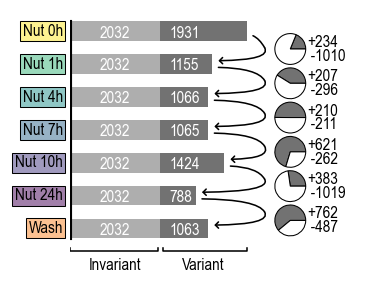

In [48]:
fig = plt.figure(figsize=(2.6, 2), dpi=150)
    
tadax = fig.add_axes((0.2, 0.15, 0.5, 0.8))
invar = sum((tads[f"score_0h"] > 4) & 
            (tads[f"score_1h"] > 4) &
            (tads[f"score_4h"] > 4) &
            (tads[f"score_7h"] > 4) &
            (tads[f"score_10h"] > 4) &
            (tads[f"score_24h"] > 4) &
            (tads[f"score_w24h"] > 4)
           )
maxval = 0
for n, t1 in enumerate(tps):
    total = sum((tads[f"score_{t1}"] > 4))
    maxval = max(maxval, total)
    tadax.barh(n, invar, color="#AEAEAE", height=0.6)
    tadax.barh(n, total-invar, left=invar, color="#727272", height=0.6)
    tadax.text(invar / 2  , n + 0.05, invar, va='center', ha='center', color='white', weight="bold", size=8)
    tadax.text(invar * 1.1, n + 0.05, total - invar, va='center', ha='left', color='white', weight="bold", size=8)
    tadax.text(-150, n, "Wash" if t1.startswith('w') else f"Nut {t1}", va='center', ha='right', size=8,  
               bbox=dict(boxstyle="square", ec=(0, 0, 0, 1), lw=0.5,
                         fc=colors[t1], alpha=None, pad=0.15))

tadax.plot([10, 10, invar - 50, invar - 50], [6.6, 6.7, 6.7, 6.6], 'k', lw=0.75)
tadax.plot([invar + 50, invar + 50, maxval, maxval], [6.6, 6.7, 6.7, 6.6], 'k', lw=0.75)
tadax.text(invar / 2, 6.9, 'Invariant', va='top', ha='center', size=8)
tadax.text((invar + maxval) / 2, 6.9, 'Variant', va='top', ha='center', size=8)


maxval = maxval * 1.1
prev = None
for n, t1 in enumerate(tps):
    total = sum((tads[f"score_{t1}"] > 4))
    if prev is not None:
        tadax.annotate("", xytext=(prev, n - 0.9), xy=(maxval, n - 0.5), 
                       xycoords='data', textcoords='data', size=1, va='center', ha='center',
                      arrowprops=dict(arrowstyle="-", shrinkA=3,shrinkB=0,
                            lw=0.75, connectionstyle="angle3,angleA=0,angleB=120"))
        tadax.annotate("", xytext=(maxval, n - 0.5), xy=(total, n - 0.1), 
                       xycoords='data', textcoords='data', size=0, va='center', ha='center',
                      arrowprops=dict(arrowstyle="->,head_width=1.5,head_length=1.5", shrinkA=0,shrinkB=3,
                            lw=0.75, connectionstyle="angle3,angleA=120,angleB=0"))
    prev = total

tadax.plot([0, 0], [6.3, -0.3], 'k')
tadax.set_ylim(6.8, -0.5)
tadax.set_xlim(0, maxval)
tadax.axison = False

difax = fig.add_axes((0.72, 0.15, 0.25, 0.8))
yticks = []
for n, t1 in enumerate(tps[:-1]):
    t2 = tps[n + 1]
    yticks.append(f"{t2} - {t1}")
    gain = sum(~(tads[f"score_{t1}"] > 4) &  (tads[f"score_{t2}"] > 4))
    loss = sum( (tads[f"score_{t1}"] > 4) & ~(tads[f"score_{t2}"] > 4))
    difax.pie([gain, loss], center=(-0.9, n + 0.5), frame=False, radius=0.45, counterclock=False,
             colors=['#727272', 'w'], wedgeprops={"edgecolor":"k",'linewidth': 0.5})
    plt.text(-0.4, 0.5 + n - 0.2, f"+{gain}", color='k', va='center', size=8, weight='bold')
    plt.text(-0.4, 0.5 + n + 0.2, f" -{loss}", color='k', va='center', size=8, weight='bold')
difax.set_xlim(-1, 1)
difax.set_ylim(6.5, -0.5)
# plt.yticks(range(1, len(tps)), yticks[::-1])
# plt.savefig('TAD_changes_barplot.pdf', dpi=300)
# plt.savefig('TAD_changes_barplot.png', dpi=300)

## TAD size

In [49]:
chromosomes = set(tads["Chromosome"])

In [50]:
times = [c[4:] for c in tads.columns if c.startswith("pos_")][:-1]

In [82]:
times

['0h', '1h', '4h', '7h', '10h', '24h', 'w24h']

In [51]:
sizes = {}
for t in times:
    sizes[t] = []
    too_long = 0
    for c in chromosomes:
        prev_pos =1
        for pos in tads[(tads["Chromosome"] == c) & (tads[f"score_{t}"] > 4)][f"pos_{t}"]:
            size = (pos - prev_pos) * 50_000
            if size > 1_900_000:
                too_long += 1
            else:
                sizes[t].append(size)            
            prev_pos = pos
    print(t, too_long)

0h 213
1h 260
4h 261
7h 266
10h 251
24h 335
w24h 279


In [52]:
for t in times:
    print(t, np.mean(sizes[t]) // 1_000, np.median(sizes[t]) // 1_000)

0h 586.0 450.0
1h 700.0 600.0
4h 724.0 600.0
7h 718.0 600.0
10h 657.0 550.0
24h 712.0 600.0
w24h 710.0 600.0


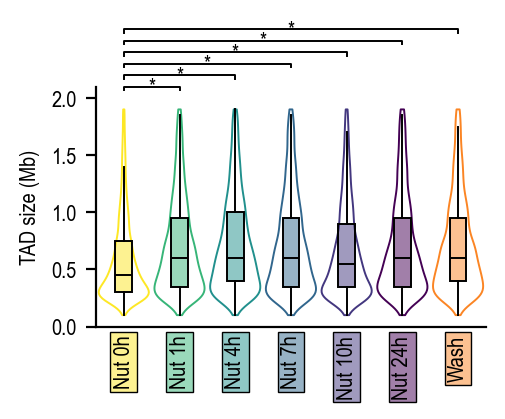

In [53]:
fig = plt.figure(figsize=(2.5, 2), dpi=200, facecolor='w')
ax = fig.add_axes((0.2, 0.2, 0.78, 0.6))

bps = ax.boxplot([sizes[t] for t in sizes],showcaps=False, patch_artist=True,
                  showfliers=False, widths=[0.3] * len(times), zorder=100)
violin_parts = ax.violinplot([sizes[t] for t in sizes], widths=0.9, showextrema=False, )

for n, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('none')
    pc.set_edgecolor(noacolors[times[n]])
    pc.set_alpha(1)
    pc.set_linewidth(0.7)

for n, bp in enumerate(bps["boxes"]):
    bp.set_linewidth(0.7)
    bp.set_color("k")
    bp.set_facecolor(colors[times[n]])

for bp in bps["whiskers"]:
    bp.set_linewidth(0.7)
    bp.set_color("k")

for bp in bps["medians"]:
    bp.set_linewidth(0.7)
    bp.set_color("k")

    
for n, t in enumerate(times[1:], 1):
    ax.plot([1, 1, n + 1, n + 1], 
             [2_000_000 - 30_000 + n * 100_000, 
              2_000_000          + n * 100_000,
              2_000_000          + n * 100_000,
              2_000_000 - 30_000 + n * 100_000], 'k', clip_on=False, lw=0.7)
    r, pv = stats.mannwhitneyu(sizes['0h'], sizes[t])
    if pv < 0.01:
        ax.text((n + 2) / 2, 2_000_000 + n * 100_000, '*', ha='center', va='center', size=8)
    
    
ax.set_ylim(0, 3_100_000)

ax.set_yticks([0, 500_000, 1_000_000, 1_500_000, 2_000_000])
ax.set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0])
ax.set_ylabel("TAD size (Mb)", size=8)
ax.set_ylim(0, 2_100_000)
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.spines[['right', 'top']].set_visible(False)

for x, t in enumerate(sizes, 1):
    ax.text(x, -75000, "Wash" if t.startswith('w') else f"Nut {t}", size=8,
             bbox=dict(boxstyle="square", ec=(0, 0, 0, 1), lw=0.5,
                       fc=colors[t], alpha=None, pad=0.15), rotation=90, va='top', ha='center')

# plt.savefig('TAD_size_violin.pdf', dpi=300)
# plt.savefig('TAD_size_violin.png', dpi=300)

## TAD border clustering

### Remove invariant TAD borders

In [54]:
tads = tads[~(tads['score_0h'] > cut) | ~(tads['score_1h' ] > cut) | ~(tads['score_4h' ] > cut) |
            ~(tads['score_7h'] > cut) | ~(tads['score_10h'] > cut) | ~(tads['score_24h'] > cut)]

In [55]:
for t in tps:
    tads[f"filt_IS_{t}"] = (tads[f'score_{t}'] > cut) * tads[f'IS_{t}']

/tmp/ipykernel_75234/4068017507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tads[f"filt_IS_{t}"] = (tads[f'score_{t}'] > cut) * tads[f'IS_{t}']
/tmp/ipykernel_75234/4068017507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tads[f"filt_IS_{t}"] = (tads[f'score_{t}'] > cut) * tads[f'IS_{t}']
/tmp/ipykernel_75234/4068017507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [56]:
tads

,Chromosome,position,pos_0h,score_0h,density_0h,IS_0h,pos_1h,score_1h,density_1h,IS_1h,...,masked_IS_10h,masked_IS_24h,masked_IS_w24h,filt_IS_0h,filt_IS_1h,filt_IS_4h,filt_IS_7h,filt_IS_10h,filt_IS_24h,filt_IS_w24h
39,chr1,887500,NaN,NaN,NaN,NaN,17.0,6.0,0.094,0.828398,...,NaN,NaN,NaN,NaN,0.828398,0.847827,0.740473,NaN,NaN,0.198819
60,chr1,1350000,NaN,NaN,NaN,NaN,27.0,7.0,0.436,0.767976,...,NaN,NaN,NaN,NaN,0.767976,0.679014,0.763588,NaN,NaN,0.208175
69,chr1,1567187,31.0,5.0,0.036,0.796707,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.796707,NaN,0.681208,0.651376,0.933912,NaN,0.340341
81,chr1,1850000,37.0,6.0,1.042,0.644016,37.0,4.0,1.369,0.573500,...,NaN,NaN,NaN,0.644016,0.000000,0.567038,0.541063,NaN,NaN,0.316758
90,chr1,2087500,42.0,4.0,1.394,0.759987,42.0,4.0,1.586,0.596598,...,0.0,NaN,NaN,0.000000,0.000000,0.602954,0.652073,0.000000,NaN,0.411543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,chrX,152072656,3042.0,10.0,0.720,0.872364,3041.0,9.0,1.207,0.934090,...,NaN,NaN,NaN,0.872364,0.934090,0.905695,0.848087,0.905871,NaN,0.713721
4405,chrX,152787500,3056.0,10.0,0.986,0.857745,3056.0,4.0,0.813,0.732951,...,0.0,NaN,NaN,0.857745,0.000000,0.000000,0.689043,0.000000,NaN,0.489622
4415,chrX,153400000,3068.0,8.0,0.585,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,0.977035,NaN,1.000000,NaN,NaN
4420,chrX,153750000,NaN,NaN,NaN,NaN,3074.0,8.0,0.575,0.889570,...,NaN,NaN,NaN,NaN,0.889570,NaN,0.883860,NaN,NaN,0.479904


In [57]:
scores = tads[[f'filt_IS_{t}' for t in tps]]

In [58]:
scores = scores.fillna(-2)
scores = scores.replace(0, -2)

In [59]:
Y = sch.linkage(scores, method='ward', optimal_ordering=True)#, metric=my_dist_func)

[]

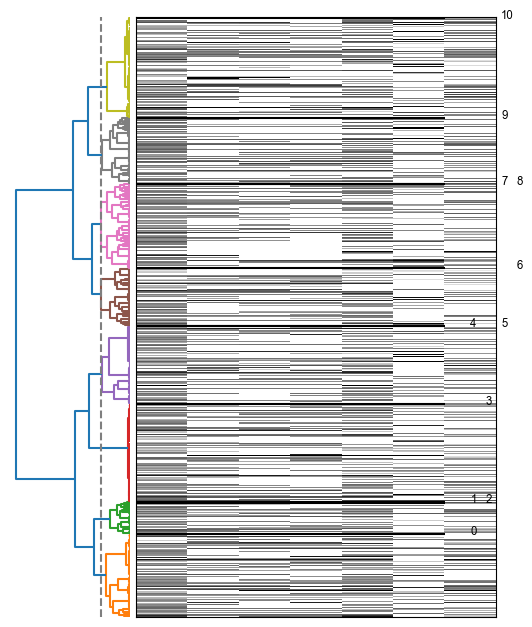

In [60]:
ddcut = 34
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Z1 = sch.dendrogram(Y, orientation='left', color_threshold=ddcut) #link_color_func=lambda x: 'k')
switches = np.array([i for i, c in enumerate (Z1['color_list'][1:]) if Z1['color_list'][i] != c])
ax1.axison = False
ax1.axvline(ddcut, ls='--', color='tab:grey')
idx1 = np.array(Z1['leaves'])
D = scores.to_numpy()#[idx1,:]
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Greys, vmin=0)
clusters = set(Z1['color_list'])
# for c in clusters:
axmatrix.hlines(switches, -0.5, 5.5, color='k')
for n, v in enumerate(switches):
    plt.text(6 + (v%4) * 0.3, v, n)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

### Sort inside clusters

In [61]:
scores.reindex(idx1)

,filt_IS_0h,filt_IS_1h,filt_IS_4h,filt_IS_7h,filt_IS_10h,filt_IS_24h,filt_IS_w24h
1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,0.807005,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.681150
296,0.580115,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
850,-2.000000,0.457091,-2.000000,-2.000000,-2.000000,0.392414,-2.000000
...,...,...,...,...,...,...,...
241,0.418816,0.400774,-2.000000,-2.000000,0.422511,-2.000000,-2.000000
1326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,0.805318,0.742268,0.708002,0.746622,0.843107,-2.000000,0.578892
806,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.655769,-2.000000


In [62]:
Y = sch.linkage(scores[scores.columns[:-1]], method='ward', optimal_ordering=True)#, metric=my_dist_func)

[]

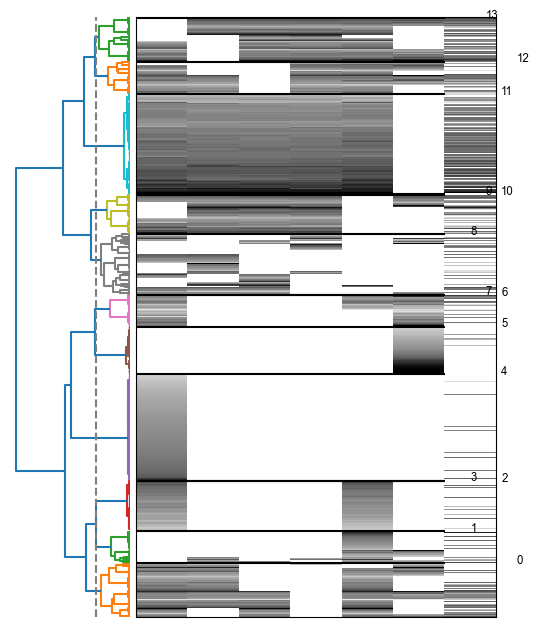

In [63]:
ddcut = 34
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Z1 = sch.dendrogram(Y, orientation='left', color_threshold=ddcut) #link_color_func=lambda x: 'k')
switches = np.array([i for i, c in enumerate (Z1['color_list'][1:]) if Z1['color_list'][i] != c])
ax1.axison = False
ax1.axvline(ddcut, ls='--', color='tab:grey')
idx1 = np.array(Z1['leaves'])
D = scores.to_numpy()[idx1,:]
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Greys, vmin=0)
clusters = set(Z1['color_list'])
# for c in clusters:
axmatrix.hlines(switches, -0.5, 5.5, color='k')
for n, v in enumerate(switches):
    plt.text(6 + (v%4) * 0.3, v, n)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

#### Rearrange clusters an group most variable clusters

In [64]:
cluster_order = [5, 11, 2, 4]
cluster_pos = len(switches) - len(cluster_order)
cluster_order = [v for v in range(len(switches) + 1) if not v in cluster_order] + cluster_order

In [65]:
from matplotlib.colors import to_rgba

In [66]:
D[:,-1:].T

array([[-2.        ,  0.38483761,  0.74669261, ...,  0.60755923,
        -2.        , -2.        ]])

In [67]:
scores = scores.replace(-2, float('nan'))

In [68]:
from matplotlib import colors as colors_
divnorm=colors_.TwoSlopeNorm(vmin=0, vcenter=0.85, vmax=1)

In [85]:
total

2519

posx and posy should be finite values
posx and posy should be finite values
/home/fransua/.miniconda3/lib/python3.11/site-packages/matplotlib/transforms.py:354: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values


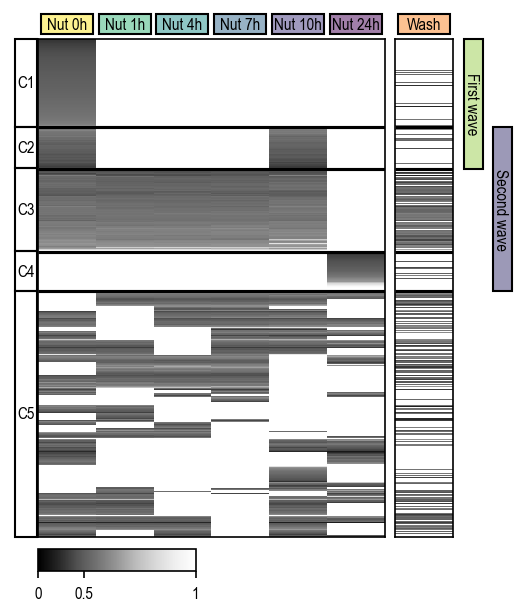

In [93]:
fig = plt.figure(figsize=(3.5, 4), dpi=150)
Z1 = sch.dendrogram(Y, orientation='left', no_plot=True, color_threshold=ddcut) #link_color_func=lambda x: 'k')
switches = np.array([i+1 for i, c in enumerate (Z1['color_list'][1:]) if Z1['color_list'][i] != c])
switch_range = []
total = 0
for n, v in enumerate(switches):
    switch_range.append((total, v))
    total = v
switch_range.append((total, len(scores)))
switch_range = np.array(switch_range)
new_order = [v for i, j in switch_range[cluster_order] for v in range(i, j)]
# ax1.axison = False
# ax1.axvline(ddcut, ls='--', color='tab:grey')
idx1 = np.array(Z1['leaves'])[new_order]
D = scores.to_numpy()[idx1,:]

axmatrix = fig.add_axes([0.02, 0.12, 0.62, 0.82])
im1 = axmatrix.matshow(D[:,:-1], aspect='auto', origin='lower', cmap=plt.cm.Greys_r, norm=divnorm)

axwash    = fig.add_axes([0.69, 0.12, 0.2, 0.82])
im2 = axwash.matshow(D[:,-1:], aspect='auto', origin='lower', cmap=plt.cm.Greys_r, norm=divnorm)

# compute new hlines
total = 0
hpos = []
cuts = []
for i, j in switch_range[cluster_order]:
    v = j - i
    total += v
    hpos.append(total)
hpos = hpos[cluster_pos:cluster_pos + 4]

axmatrix.hlines(hpos, -0.5, 5.5, color='k')
axmatrix.set_ylim(0, total)
axmatrix.set_xticks([])
axwash.hlines(hpos, -0.5, 0.5, color='k')
axwash.set_ylim(0, total)
axwash.set_xticks([])

hpos = [0] + hpos + [len(scores)]
axmatrix.set_yticks([])
axwash.set_yticks([])
axmatrix.autoscale(False)
axwash.autoscale(False)

for n, v in enumerate(hpos[:-1], 1):
    axmatrix.text(-0.86, (v + hpos[n]) / 2, f"C{6 - n}", va='center', size=8)
    rect = patches.Rectangle((-0.9, v + 1), 0.38, abs(hpos[n] - hpos[n - 1]) - 0, linewidth=1,
                             edgecolor='k', facecolor='none', clip_on=False)
    axmatrix.add_patch(rect)

# First wave
y1 = hpos[-1]
y2 = hpos[-3]
axwash.text(0.7, (y1 + y2) / 2, "First wave", va='center', ha='left', size=8, rotation=-90)
rect = patches.Rectangle((0.7, y1), 0.32, -abs(y2 - y1), linewidth=1,
                         edgecolor='k', 
                         facecolor=np.mean((to_rgba(colors['0h'], 0.5),  to_rgba(colors['1h'], 0.5)), axis=0),
                         clip_on=False)
axwash.add_patch(rect)

y1 = hpos[-2]
y2 = hpos[-5]
axwash.text(1.2, (y1 + y2) / 2, "Second wave", va='center', ha='left', size=8, rotation=-90)
rect = patches.Rectangle((1.2, y1), 0.32, -abs(y2 - y1), linewidth=1,
                         edgecolor='k', 
                         facecolor=np.mean((to_rgba(colors['7h'], 0.5),  to_rgba(colors['24h'], 0.5)), axis=0), 
                         clip_on=False)
axwash.add_patch(rect)

ypost = len(Y) * 1.01
yposm = len(Y) * 1.029
yposb = len(Y) * 1.05
ydiff = yposb - ypost
for n, t in enumerate(tps[:-1]):
    axmatrix.text(n, yposm, f"Nut {t}", va='center', ha='center', size=8)
    rect = patches.Rectangle((n - 0.45, ypost), 0.9, ydiff, linewidth=1,
                             edgecolor='k', facecolor=to_rgba(colors[t], 0.5), clip_on=False)
    axmatrix.add_patch(rect)

axwash.text(0, yposm, "Wash", va='center', ha='center', size=8)
rect = patches.Rectangle((0 - 0.45, ypost), 0.9, ydiff, linewidth=1,
                         edgecolor='k', facecolor=to_rgba(colors["w24h"], 0.5), clip_on=False)
axwash.add_patch(rect)

cax = plt.colorbar(im1, orientation="horizontal", aspect=7)
cax.ax.set_position((0.07, 0.01, 0.3, 0.08))
cax.set_ticks([0, 0.5, 1])
cax.set_ticklabels([0, 0.5, 1])
cax.ax.tick_params(labelsize=8)
cax.ax.text(1.1, 0.2, "Sigmoid insulation score", size=8)

axmatrix.set_position([0.07, 0.11, 0.66, 0.83])
axwash.set_position(  [0.75, 0.11, 0.11 , 0.83])

# plt.savefig('TAD_heatmap.pdf', dpi=300)
# plt.savefig('TAD_heatmap.png', dpi=300)